<a href="https://colab.research.google.com/github/tendaiterrencemachaya/35472025_Churning_Customers/blob/main/35472025_AI_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML/CustomerChurn_dataset.csv')
df.head() # veiwing the top 5 records of our dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Checking the various attributes of our dataset and Data cleaning

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# **1. Relevant features that can define a customer churn**

### Based on the dataset features above, The relevent list of features that can define a customer churn are:

- Demographic Information:
        gender
        SeniorCitizen
        Partner
        Dependents
- Customer Usage Patterns:
        tenure
        MonthlyCharges
        TotalCharges

- Services Subscribed:
        PhoneService
        MultipleLines
        InternetService
        OnlineSecurity
        OnlineBackup
        DeviceProtection
        TechSupport
        StreamingTV
        StreamingMovies

- Contract and Billing Information:
        Contract
        PaperlessBilling
        PaymentMethod

These features are selected based on their potential relevance to predicting customer churn. However, it's important to note that the actual relevance of features can vary based on the specific characteristics of our dataset.
Thus further analysis for feature importance still needs to be done to select the most relevant features by feature importance to train a Multi-Layer Perceptron model using the Functional API. I did not include the customerID because it is a unique identifier for each customer thus it won't have an effect on churn which is our target variable.


# 2. EDA to find out which customer profiles relate to churning a lot:

In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Summary statistics for the numeric columns (SeniorCitizen, MonthlyCarges, tenure)
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


#### **Churn Ratio (No : Yes)**

In [9]:
# Churn value counts
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Visualizing the ratio of Churn

Text(0.5, 1.0, 'Churn counting ratio')

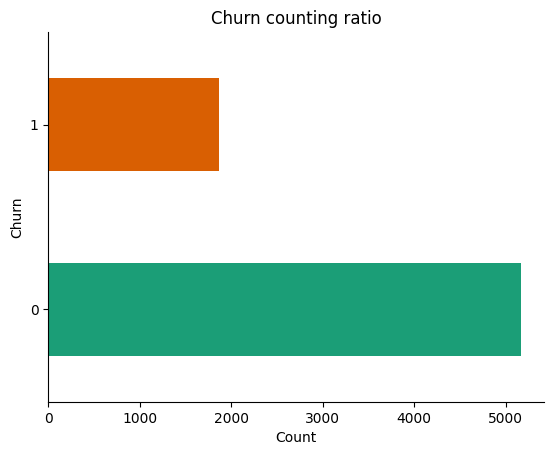

In [82]:
# Visualizing the distribution of the target variable 'Churn'
df.groupby('Churn').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel('Churn')
plt.xlabel('Count')
plt.title('Churn counting ratio')

In [11]:
# Churn Ratio
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

**- Churn Data is not balanced. The churn ratio of no to yes is: 73:27.**

In [12]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Since there are only 11 missing values out of the 7043 (0.156%) in the total charges, i am going to delete this rows.

In [13]:
# Removing the missing values
df.dropna(how ='any', inplace = True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
# Getting the max tenure
print(df['tenure'].max())

72


Removing unrequired columns

In [17]:
#droping columns customerID
df.drop(columns= ['customerID'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### **EDA of categorical features**

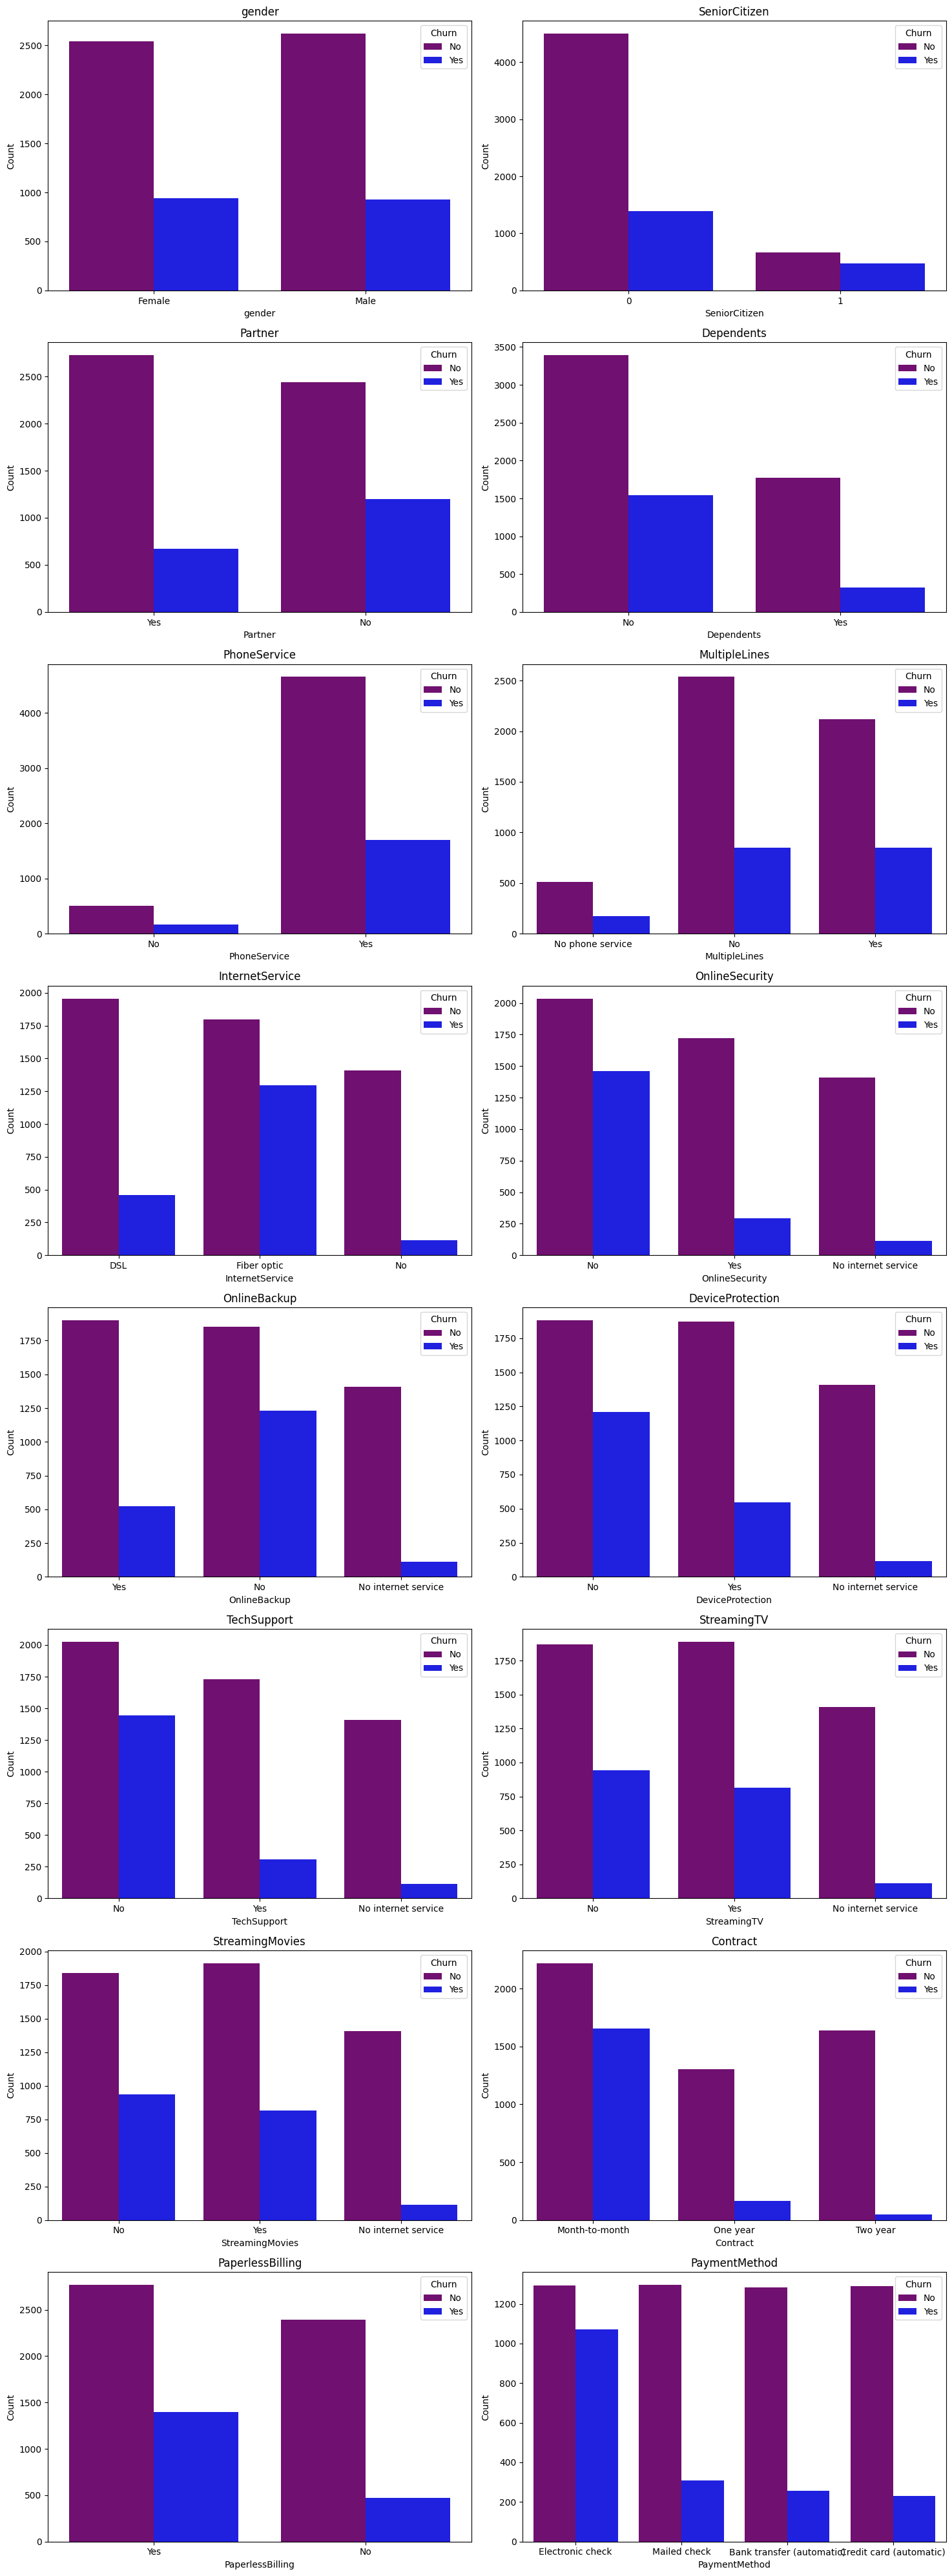

In [18]:
predictors = [col for col in df.columns if col not in ['tenure','Churn', 'TotalCharges', 'MonthlyCharges']]

# Calculating the number of rows and columns for subplots
num_predictors = len(predictors)
num_cols = 2
num_rows = (num_predictors + num_cols - 1) // num_cols

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flattenning the axes array to simplify indexing
axes = axes.flatten()

# Plotting each predictor in a separate subplot
for i, predictor in enumerate(predictors):
    sns.countplot(data=df, x=predictor, hue='Churn', palette=['purple', 'blue'], ax=axes[i])
    axes[i].set_title(predictor)
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

- **There is no significant difference in churn rate gender wise as shown by the first plot above. Both genders, female and male have almost equal churn rate**

- **From the plot above it is clear that the number of Senior citizen is lower than the rest of the ratio of senior citezen that churn is relatively higher than the non senior citizen one. Meaning senior citizen have some significance in churn**

- **Partner, Having a partner does affect churn rate. As shown by the plot, customers with and without partners are almost 1:1 but the churn rate of customer having a partner is low. Partner affects churn rate**

- **Although there is a huge difference between customers with and without dependences, the proportion of churn rate is low in case of customers having dependents**

- **As displayed by the plots, there is no much difference between Yes and No values but there is a significant difference with customer having no Phone Service. Churn rate is approximately similar in terms of proportion.**

- **Under internet servives, fiber optic connection have highest churn rate.**

- **People with no online security have a higher churn rate**

- **Of all customers, customers without online backup have highest churn rate**

- **Customers with No Device Protection have higher churn rate**

- **Customers without tech support have a higher churn rate**

- **There is a slight difference in churn rate with customers having streaming tv services provided they have a internet connection**

- **Customers with no streaming movies subscription tends to have higher churn rates**

- **Majority of customers have month to month contract subscription. This customers also have a higher churn rate than other customers as they can cancel services after a month of getting services.**

- **Customers having paperless bill have higher churn rate.**

- **Customers having Electronic Check as their payment method have a higher churn rate**


#### **EDA of the numerical features:**

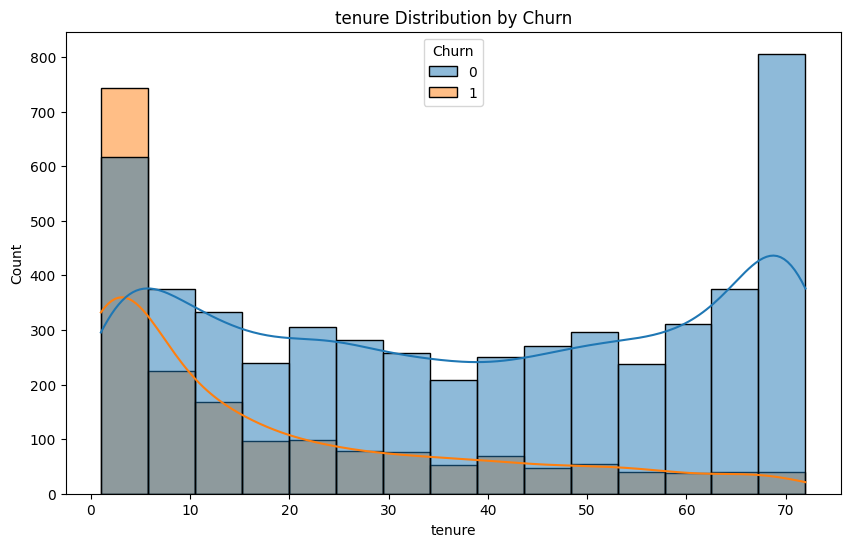

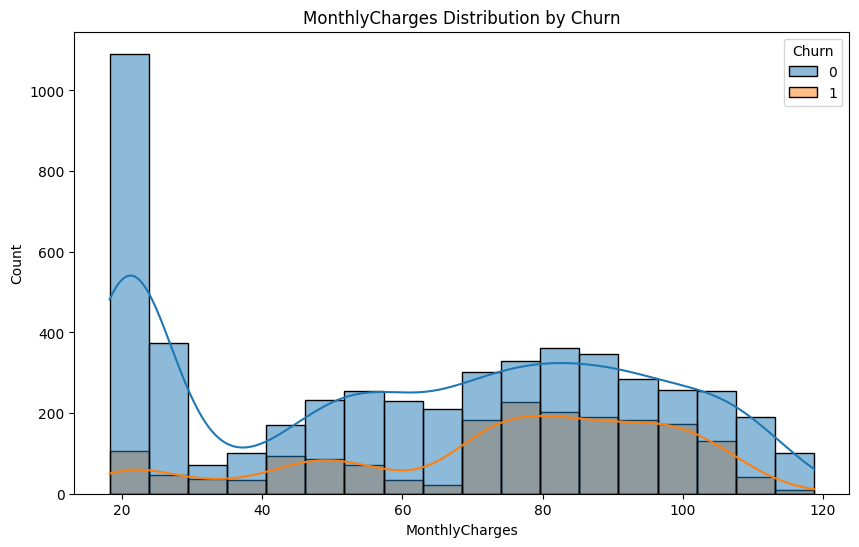

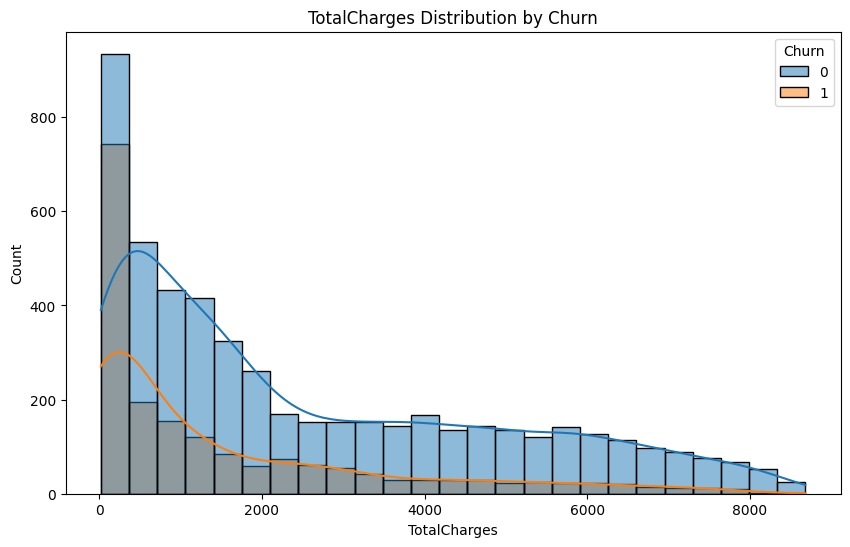

In [85]:
# Exploring the relationship between churn and numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(x=feature, hue='Churn', data=df, kde=True)
    plt.title(f'{feature} Distribution by Churn')
    plt.show()

<Axes: xlabel='Churn', ylabel='tenure'>

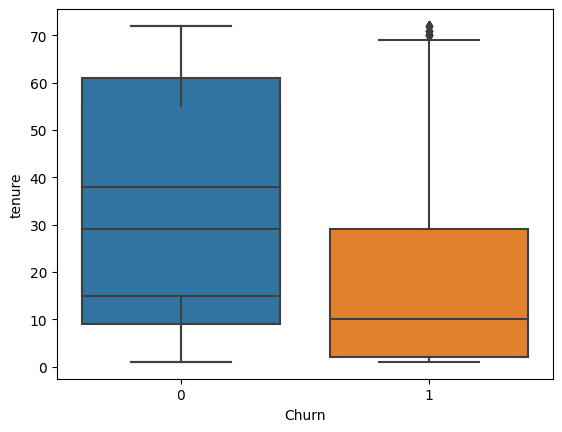

In [84]:
# Boxplot
sns.boxplot(y=df['tenure'])
# Churn Rate wise Distribution
sns.boxplot(data=df,y='tenure',x='Churn')

- **Customer having a higher churn rate are usually the one who are with have a tenure less than 30 months. Tenure of customer who churned may be more than 30 months but it’s in very  few cases.**

- **Customers have a higher churn rate when they have high monthly charges**

##### Data Cleaning

**Converting the target variable 'Churn' into a binary numeric variable i.e. Yes=1 ; No = 0**

In [20]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Converting all the categorical variables into dummy variables (One Hot Encoding)

In [21]:
categ_var = ['gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                   'OnlineBackup','TechSupport','StreamingTV','StreamingMovies','Contract',
             'PaymentMethod','DeviceProtection', 'Partner',	'Dependents',	'PhoneService',	'PaperlessBilling']

df_dummies = pd.get_dummies(df, columns=categ_var)
df_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,DeviceProtection_No internet service,DeviceProtection_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,1,1,0,1,0,0,1
1,0,34,56.95,1889.50,0,0,1,1,0,0,...,0,1,1,0,1,0,0,1,1,0
2,0,2,53.85,108.15,1,0,1,1,0,0,...,0,0,1,0,1,0,0,1,0,1
3,0,45,42.30,1840.75,0,0,1,0,1,0,...,0,1,1,0,1,0,1,0,1,0
4,0,2,70.70,151.65,1,1,0,1,0,0,...,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
7039,0,72,103.20,7362.90,0,1,0,0,0,1,...,0,1,0,1,0,1,0,1,0,1
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,0,0,1,0,1,1,0,0,1
7041,1,4,74.40,306.60,1,0,1,0,0,1,...,0,0,0,1,1,0,0,1,0,1


## Feature Extraction
- using Recursive Feature Elimination (RFE)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Standardizing numerical features
X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn']

In [24]:
model = RandomForestClassifier(n_estimators=150, random_state=42)
fit = model.fit(X, y)

# Extracting feature importances
feature_importances = pd.Series(fit.feature_importances_, index=X.columns)

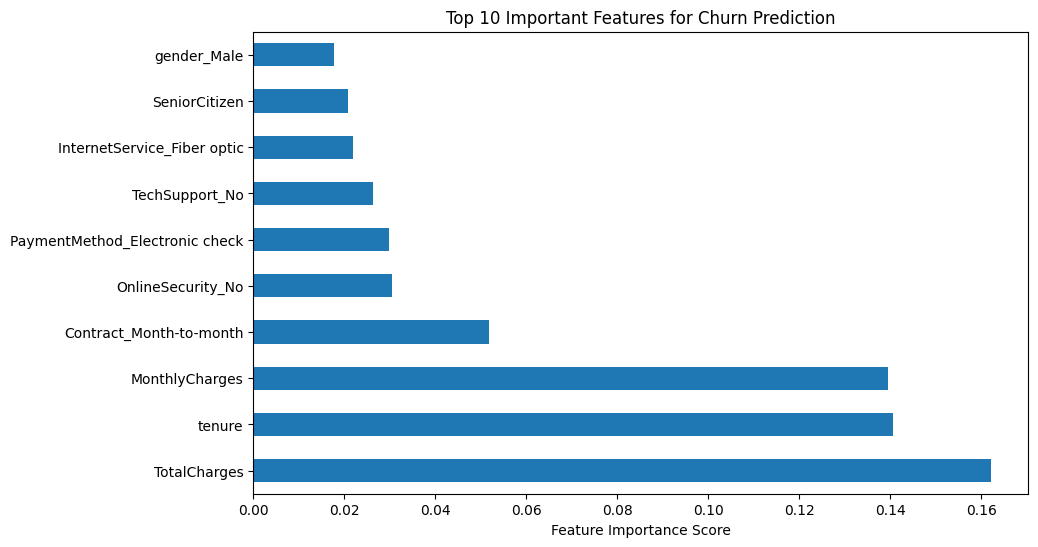

In [25]:
# Plotting the top 10 features
top_n = 10
plt.figure(figsize=(10, 6))
sorted_feat = feature_importances.sort_values(ascending=False)
sorted_feat[:top_n].plot(kind='barh')
plt.title('Top {} Important Features for Churn Prediction'.format(top_n))
plt.xlabel('Feature Importance Score')
plt.show()

In [76]:
# Extracting relevant features based on importance
threshold_importance = 0.025 # Setting the threshold to 0.025
relevant_features = sorted_feat[sorted_feat > threshold_importance].index
final_features = X[relevant_features]
final_features

,TotalCharges,tenure,MonthlyCharges,Contract_Month-to-month,OnlineSecurity_No,PaymentMethod_Electronic check,TechSupport_No
0,29.85,1,29.85,1,1,1,1
1,1889.50,34,56.95,0,0,0,1
2,108.15,2,53.85,1,0,0,1
3,1840.75,45,42.30,0,0,0,0
4,151.65,2,70.70,1,1,1,1
...,...,...,...,...,...,...,...
7038,1990.50,24,84.80,0,0,0,0
7039,7362.90,72,103.20,0,1,0,1
7040,346.45,11,29.60,1,0,1,1
7041,306.60,4,74.40,1,1,0,1


## Correlation Matrix
- of selected features

<Axes: >

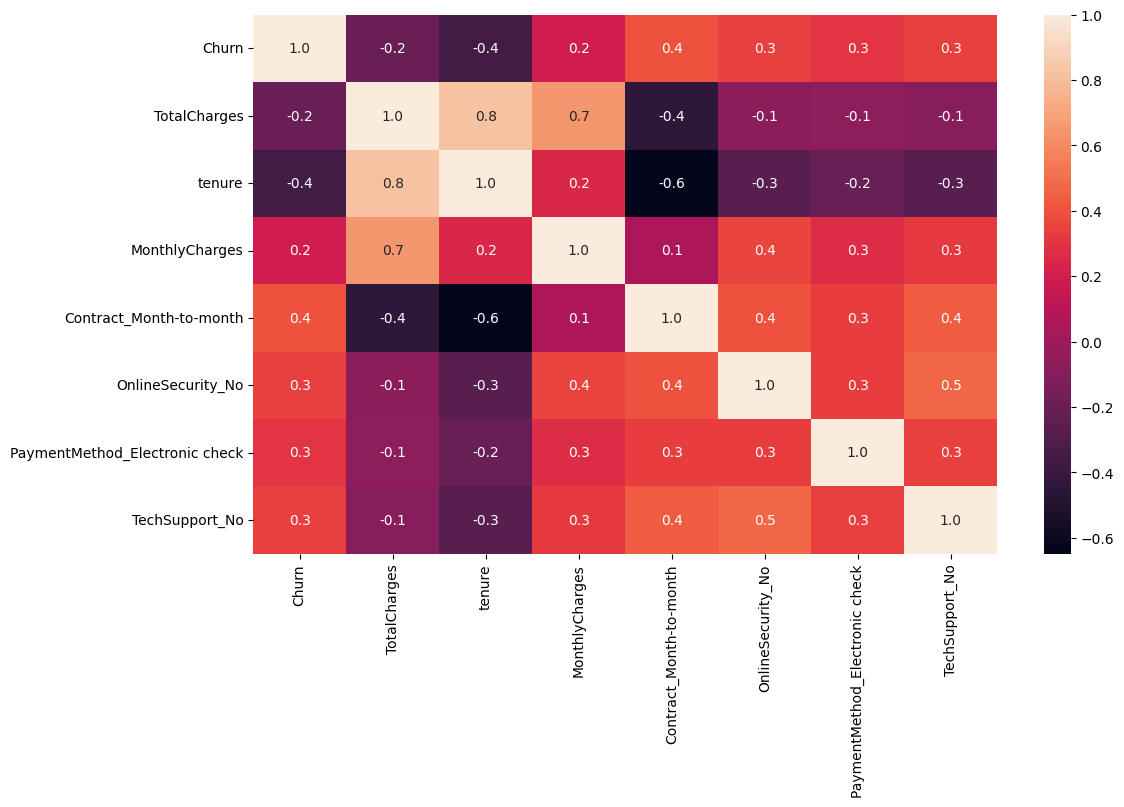

In [81]:
corr = pd.concat([ df_dummies['Churn'],final_features], axis=1)
plt.figure(figsize=(12,7))
sns.heatmap(corr.corr(),annot=True,fmt='.1f')

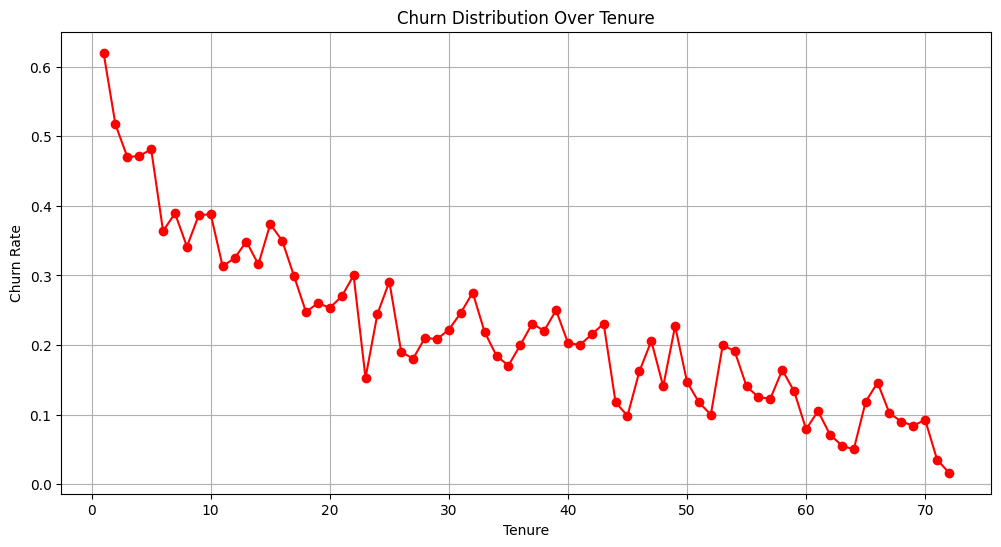

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import base64

# Assuming 'tenure' is the time-related feature
merged_data = pd.concat([final_features['tenure'], df_dummies['Churn']], axis=1)

time_series_data = merged_data.groupby('tenure')['Churn'].mean()

# Plotting the time series graph
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data.values, marker='o', linestyle='-', color='r')
plt.title('Churn Distribution Over Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()

### **Feature Scaling**

In [86]:
# Feature Scaling
scaler = StandardScaler()
final_features = pd.DataFrame(scaler.fit_transform(final_features),columns=final_features.columns)
final_features

,TotalCharges,tenure,MonthlyCharges,Contract_Month-to-month,OnlineSecurity_No,PaymentMethod_Electronic check,TechSupport_No
0,-0.994194,-1.280248,-1.161694,0.902613,1.005419,1.404764,1.012594
1,-0.173740,0.064303,-0.260878,-1.107895,-0.994611,-0.711863,1.012594
2,-0.959649,-1.239504,-0.363923,0.902613,-0.994611,-0.711863,1.012594
3,-0.195248,0.512486,-0.747850,-1.107895,-0.994611,-0.711863,-0.987563
4,-0.940457,-1.239504,0.196178,0.902613,1.005419,1.404764,1.012594
...,...,...,...,...,...,...,...
7027,-0.129180,-0.343137,0.664868,-1.107895,-0.994611,-0.711863,-0.987563
7028,2.241056,1.612573,1.276493,-1.107895,1.005419,-0.711863,1.012594
7029,-0.854514,-0.872808,-1.170004,0.902613,-0.994611,1.404764,1.012594
7030,-0.872095,-1.158016,0.319168,0.902613,1.005419,-0.711863,1.012594


# **3. Defining and training a Multi-Layer Perceptron model using the Functional API**

In [93]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, classification_report
from tensorflow.keras import optimizers

In [30]:
# Splitting the data into training, validating and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_features, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [88]:
X_train

,TotalCharges,tenure,MonthlyCharges,Contract_Month-to-month,OnlineSecurity_No,PaymentMethod_Electronic check,TechSupport_No
313,-0.856654,-1.117272,0.151304,0.902613,1.005419,1.404764,1.012594
633,-0.020780,0.308766,-0.340655,-1.107895,-0.994611,-0.711863,-0.987563
2709,1.227185,0.879182,1.007245,-1.107895,1.005419,-0.711863,-0.987563
409,-0.998716,-1.280248,-1.502408,0.902613,-0.994611,-0.711863,-0.987563
5106,0.807549,0.716206,0.618332,0.902613,-0.994611,1.404764,1.012594
...,...,...,...,...,...,...,...
4751,-0.972532,-1.280248,0.470412,0.902613,1.005419,1.404764,1.012594
6883,-0.859720,-1.198760,1.366242,0.902613,1.005419,1.404764,1.012594
2026,-0.951995,-1.117272,-1.321248,0.902613,1.005419,-0.711863,1.012594
760,-0.915222,-1.198760,0.182882,0.902613,1.005419,1.404764,1.012594


In [87]:
X_val

,TotalCharges,tenure,MonthlyCharges,Contract_Month-to-month,OnlineSecurity_No,PaymentMethod_Electronic check,TechSupport_No
2310,0.166680,0.105047,0.287589,-1.107895,1.005419,-0.711863,-0.987563
2368,0.427312,1.368109,-0.511843,-1.107895,1.005419,-0.711863,-0.987563
2875,-0.547029,-0.832064,0.503652,0.902613,1.005419,-0.711863,1.012594
1171,-0.553227,-0.791321,0.505314,0.902613,-0.994611,-0.711863,1.012594
661,-0.998518,-1.280248,-1.487450,0.902613,-0.994611,-0.711863,-0.987563
...,...,...,...,...,...,...,...
4816,2.139671,1.612573,1.078712,-1.107895,1.005419,-0.711863,1.012594
6948,0.467085,0.227279,0.807802,-1.107895,1.005419,-0.711863,1.012594
654,-0.625692,-0.913552,1.007245,0.902613,1.005419,-0.711863,-0.987563
2171,-0.440791,1.408853,-1.509057,-1.107895,-0.994611,-0.711863,-0.987563


In [90]:
from sklearn.utils import class_weight

# Calculating class weights since from our EDA we saw that the dataset is not balanced

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Converting to dictionary format
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
class_weight_dict

{0: 0.6782991900905193, 1: 1.9021376085504342}

In [91]:
# Defining the MLP model using the Functional API

input_layer = tf.keras.Input(shape=(len(relevant_features),))
hidden_layer1 = tf.keras.layers.Dense(128, activation='relu')(input_layer)
dropout1 = tf.keras.layers.Dropout(0.50)(hidden_layer1)
hidden_layer2 = tf.keras.layers.Dense(64, activation='relu')(hidden_layer1)
dropout2 = tf.keras.layers.Dropout(0.60)(hidden_layer2)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer2)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

In [92]:
# Compiling the model
model.compile(optimizer = optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Trainning the model 1
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), class_weight=class_weight_dict)

Epoch 1/100
178/178 [==============================] - 3s 4ms/step - loss: 0.6113 - accuracy: 0.6232 - val_loss: 0.5561 - val_accuracy: 0.7267
Epoch 2/100
178/178 [==============================] - 1s 4ms/step - loss: 0.5228 - accuracy: 0.7257 - val_loss: 0.5168 - val_accuracy: 0.7362
Epoch 3/100
178/178 [==============================] - 0s 3ms/step - loss: 0.5046 - accuracy: 0.7319 - val_loss: 0.5094 - val_accuracy: 0.7362
Epoch 4/100
178/178 [==============================] - 0s 2ms/step - loss: 0.4984 - accuracy: 0.7336 - val_loss: 0.5074 - val_accuracy: 0.7393
Epoch 5/100
178/178 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7349 - val_loss: 0.5075 - val_accuracy: 0.7393
Epoch 6/100
178/178 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.7350 - val_loss: 0.5077 - val_accuracy: 0.7441
Epoch 7/100
178/178 [==============================] - 0s 2ms/step - loss: 0.4914 - accuracy: 0.7347 - val_loss: 0.5006 - val_accuracy: 0.7457

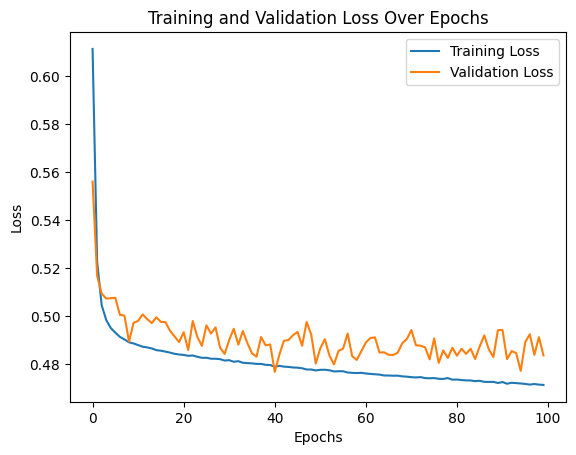

In [94]:
# Plotting training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# y_ticks = np.arange(0.3, 1.0, 0.05)
# plt.yticks(y_ticks)
plt.legend()
plt.show()

Observations:

  - The training loss decreases over the epochs, indicating that the model is learning from the training data.
  - The validation loss is being monitored on a separate set not used during training. The model seems to generalize well to unseen data, as the validation loss decreases increases, though it fluctuates.

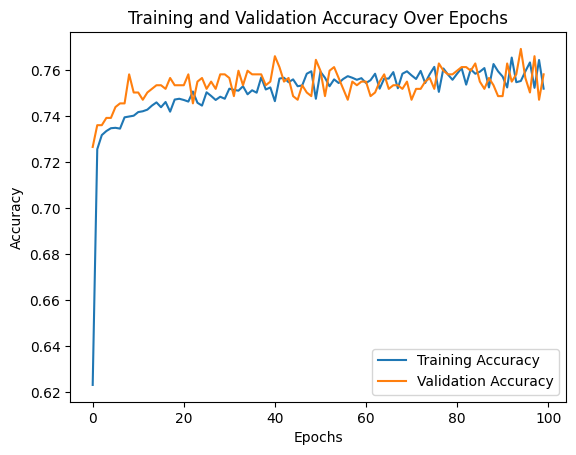

In [95]:
# Plotting training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

  - The training accuracy increases, showing that the model is becoming more accurate on the training set.
  - the validation accuracy increases, though it fluctuates thus the model was generalizing well to unseen data.

# 4. **Evaluating the model’s accuracy and calculate the AUC score**

In [98]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to 1D array
y_prob = y_pred.flatten()

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

# AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score: {:.4f}".format(auc_score))

# Confusion Matrix
print("Confusion Matrix\n",confusion_matrix(y_pred_binary,y_test))

# Classification Report
print("Classification Report\n",classification_report(y_pred_binary,y_test))

22/22 [==============================] - 0s 1ms/step
Test Accuracy: 76.56%
AUC Score: 0.8354
Confusion Matrix
 [[391  45]
 [120 148]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       436
           1       0.77      0.55      0.64       268

    accuracy                           0.77       704
   macro avg       0.77      0.72      0.73       704
weighted avg       0.77      0.77      0.76       704



- Based on the classification report:
    - Class 0 has higher precision (0.77) and recall (0.90), indicating that the model performs better on predicting class 0.
    - Class 1 has lower precision (0.77) and recall (0.55), suggesting that the model is less accurate at predicting class 1.
    - This is to be expected since we are training our model using a dataset with more class 0 than class 1

- Although, the model shows reasonably good performance it has some limitations, especially in predicting instances of class 1.  
- As a result my next step is to fine tune and optimizing the model using keras tuning and gridsearch for hyperparameter tuning

### **Hyperparameter tuning**

In [99]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
!pip install scikeras
from scikeras.wrappers import KerasClassifier
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
!pip install keras-tuner
from kerastuner.tuners import RandomSearch

In [102]:
#Wrapping Keras model as a scikit-learn compatible classifier
keras_clf = KerasClassifier(build_fn=model,epochs=50,batch_size=32,verbose=0)

#Using stratifiedkfold for cross validation
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [103]:
# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'optimizer': ['rmsprop', 'sgd', 'adam'],
    'epochs': [50, 100],
    'batch_size': [32, 64, 128]
}

# Defining  the model using the Functional API

def create_model():
    input_layer = Input(shape=(len(relevant_features),))
    hidden_layer1 = Dense(128, activation='relu')(input_layer)
    dropout1 = tf.keras.layers.Dropout(0.50)(hidden_layer1)
    hidden_layer2 = Dense(64, activation='relu')(dropout1)
    dropout2 = tf.keras.layers.Dropout(0.60)(hidden_layer2)
    output_layer = Dense(1, activation='sigmoid')(dropout2)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [104]:
# Creating a KerasClassifier with the model defined using the Functional API
keras_clf = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# Creating a KFold object for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Creating GridSearchCV
grid_search = GridSearchCV(keras_clf, param_grid, scoring='accuracy', n_jobs=-1, cv=skf)

# Fitting the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Accessing the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Best Hyperparameters: {'batch_size': 32, 'epochs': 50, 'optimizer': 'sgd'}
Best Accuracy: 0.8070237050043898


In [105]:
from kerastuner import HyperModel

class MyHyperModel(HyperModel):
    def build(self, hp):
        input_layer = Input(shape=(len(relevant_features),))
        hidden_layer1 = Dense(units=hp.Int('units1', min_value=32, max_value=512, step=32), activation='relu')(input_layer)
        dropout1 = tf.keras.layers.Dropout(hp.Float('dropout1', min_value=0.2, max_value=0.7, step=0.1))(hidden_layer1)
        hidden_layer2 = Dense(units=hp.Int('units2', min_value=32, max_value=256, step=32), activation='relu')(dropout1)
        dropout2 = tf.keras.layers.Dropout(hp.Float('dropout2', min_value=0.2, max_value=0.7, step=0.1))(hidden_layer2)
        output_layer = Dense(1, activation='sigmoid')(dropout2)

        model = Model(inputs=input_layer, outputs=output_layer)
        model.compile(optimizer=hp.Choice('optimizer', values=['rmsprop', 'sgd', 'adam']),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model

hypermodel = MyHyperModel()

In [106]:
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='my_project1'
)

tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val), class_weight=class_weight_dict)


Reloading Tuner from my_dir/my_project1/tuner0.json


In [107]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model2 = tuner.hypermodel.build(best_hps)

model2.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), class_weight=class_weight_dict)

Epoch 1/100
178/178 [==============================] - 2s 5ms/step - loss: 0.5116 - accuracy: 0.7340 - val_loss: 0.5304 - val_accuracy: 0.7346
Epoch 2/100
178/178 [==============================] - 1s 4ms/step - loss: 0.5006 - accuracy: 0.7419 - val_loss: 0.4944 - val_accuracy: 0.7520
Epoch 3/100
178/178 [==============================] - 1s 4ms/step - loss: 0.4999 - accuracy: 0.7384 - val_loss: 0.4855 - val_accuracy: 0.7504
Epoch 4/100
178/178 [==============================] - 1s 3ms/step - loss: 0.4985 - accuracy: 0.7398 - val_loss: 0.4873 - val_accuracy: 0.7551
Epoch 5/100
178/178 [==============================] - 1s 4ms/step - loss: 0.4931 - accuracy: 0.7363 - val_loss: 0.4841 - val_accuracy: 0.7488
Epoch 6/100
178/178 [==============================] - 1s 4ms/step - loss: 0.4961 - accuracy: 0.7433 - val_loss: 0.4803 - val_accuracy: 0.7630
Epoch 7/100
178/178 [==============================] - 1s 4ms/step - loss: 0.4928 - accuracy: 0.7421 - val_loss: 0.4901 - val_accuracy: 0.7694

In [108]:
# Evaluate the model
accuracy = model2.evaluate(X_test, y_test)[1]
# Predictions on the test set
y_pred = model2.predict(X_test)
# AUC Score
auc_score = roc_auc_score(y_test, y_pred)

print("Best Hyperparameters:", best_hps.values)
print("Test Accuracy:", accuracy)
print("AUC Score:",auc_score)

22/22 [==============================] - 0s 2ms/step
Best Hyperparameters: {'units1': 320, 'dropout1': 0.4, 'units2': 256, 'dropout2': 0.2, 'optimizer': 'rmsprop'}
Test Accuracy: 0.7514204382896423
AUC Score: 0.8295225251716132


In [109]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_binary = np.round(y_pred)

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print("Confusion Matrix\n",conf_matrix)
print("Classification Report\n",classification_report(y_pred_binary,y_test))

Confusion Matrix
 [[390 121]
 [ 54 139]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.76      0.88      0.82       444
         1.0       0.72      0.53      0.61       260

    accuracy                           0.75       704
   macro avg       0.74      0.71      0.72       704
weighted avg       0.75      0.75      0.74       704



In [110]:
# Getting the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# AUC Score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:",auc_score)

Accuracy: 0.7713068181818182
AUC Score: 0.833264045912211


In [111]:
def create_model(optimizer='adam'):
    input_layer = Input(shape=(len(relevant_features),))
    hidden_layer1 = Dense(128, activation='relu')(input_layer)
    dropout1 = tf.keras.layers.Dropout(0.25)(hidden_layer1)
    hidden_layer2 = Dense(64, activation='relu')(dropout1)
    dropout2 = tf.keras.layers.Dropout(0.25)(hidden_layer2)
    output_layer = Dense(1, activation='sigmoid')(dropout2)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

optimized_model = create_model(optimizer=best_params['optimizer'])
# Optimized model training, model 3
optimized_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1, validation_data=(X_val, y_val), class_weight=class_weight_dict)

# optimized_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

# Evaluate accuracy and AUC on the validation set
optimized_scores = optimized_model.evaluate(X_val, y_val, verbose=0)
optimized_accuracy = optimized_scores[1]
optimized_predictions = optimized_model.predict(X_val)
optimized_auc = roc_auc_score(y_val, optimized_predictions)

print(f'Optimized Model - Accuracy: {optimized_accuracy}, AUC: {optimized_auc}')


Epoch 1/50
178/178 [==============================] - 1s 3ms/step - loss: 0.5292 - accuracy: 0.7182 - val_loss: 0.4874 - val_accuracy: 0.7520
Epoch 2/50
178/178 [==============================] - 0s 3ms/step - loss: 0.5019 - accuracy: 0.7322 - val_loss: 0.5171 - val_accuracy: 0.7330
Epoch 3/50
178/178 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.7368 - val_loss: 0.5119 - val_accuracy: 0.7378
Epoch 4/50
178/178 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.7340 - val_loss: 0.4952 - val_accuracy: 0.7583
Epoch 5/50
178/178 [==============================] - 0s 3ms/step - loss: 0.4935 - accuracy: 0.7466 - val_loss: 0.4905 - val_accuracy: 0.7520
Epoch 6/50
178/178 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.7396 - val_loss: 0.4921 - val_accuracy: 0.7520
Epoch 7/50
178/178 [==============================] - 0s 3ms/step - loss: 0.4963 - accuracy: 0.7440 - val_loss: 0.4936 - val_accuracy: 0.7536
Epoch 

In [114]:
# optimized_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Evaluate accuracy and AUC on the test set
test_scores = optimized_model.evaluate(X_test, y_test, verbose=0)
test_accuracy = test_scores[1]
test_predictions = optimized_model.predict(X_test)
test_auc = roc_auc_score(y_test, test_predictions)
std_error = np.std(test_predictions)
y_pred_binary = np.round(test_predictions)


print("Confusion Matrix\n",confusion_matrix(y_pred_binary,y_test))
print("Classification Report\n",classification_report(y_pred_binary,y_test))
print(f'Test Set Performance - Accuracy: {test_accuracy:.4f}, AUC: {test_auc:.4f}')
print(f'Model Std error: {std_error}')

22/22 [==============================] - 0s 2ms/step
Confusion Matrix
 [[391  46]
 [120 147]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.77      0.89      0.82       437
         1.0       0.76      0.55      0.64       267

    accuracy                           0.76       704
   macro avg       0.76      0.72      0.73       704
weighted avg       0.76      0.76      0.75       704

Test Set Performance - Accuracy: 0.7642, AUC: 0.8328
Model Std error: 0.2829415500164032


22/22 [==============================] - 0s 2ms/step
Training Set AUC: 0.8581436336226527
Test Set AUC: 0.8328128327063666


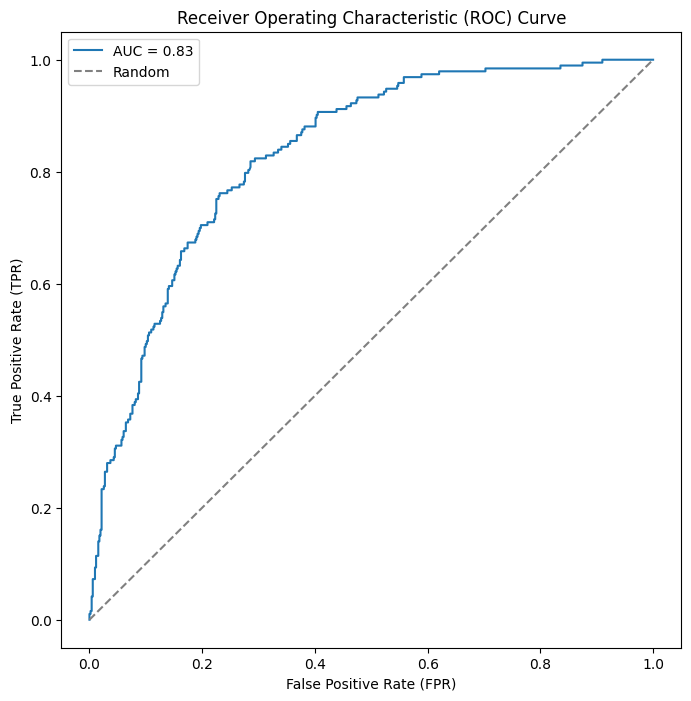

In [115]:
# Training set predictions
train_predictions = optimized_model.predict(X_train)
train_auc = roc_auc_score(y_train, train_predictions)

# Test set predictions
test_predictions = optimized_model.predict(X_test)
test_auc = roc_auc_score(y_test, test_predictions)

print(f'Training Set AUC: {train_auc}')
print(f'Test Set AUC: {test_auc}')

# Plot ROC curve for the test set
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

## **Comparison of the three models trained:**
 - In terms of Test Accuracy, Model 1 performs the best (76.56%), followed by Model 3 (76.42%), and then Model 2 (75.14%).
 - Regarding AUC Score, Model 1 has the highest value (0.8354), followed by Model 3 (0.8328), and Model 2 with the lowest (0.8295).
 - Looking at precision, recall, and f1-score, Model 1 generally has better performance for both classes compared to the other models.


## **Conclusion:**
 - Since Model 1 and Model 3 have no much difference, the optimized model is going to be deployed which is model 3

### Saving the optimized model for deployment

In [116]:
import joblib
from sklearn.preprocessing import StandardScaler

# Saving the trained model
model_filename = '/content/drive/MyDrive/ML/optimized0_churn_model.joblib'
joblib.dump(optimized_model, model_filename)

# Saving the StandardScaler
scaler_filename = '/content/drive/MyDrive/ML/churn0_standard_scaler.joblib'
joblib.dump(scaler, scaler_filename)

['/content/drive/MyDrive/ML/churn0_standard_scaler.joblib']